# LABELING UNLABELED DATA WITH PREVIOUS MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

import pickle
import joblib

import warnings
warnings.filterwarnings('ignore')

## Prepare data for classifying

In [7]:
star9999 = pd.read_csv("Star9999_raw.csv")
star99999 = pd.read_csv("Star99999_raw.csv")

cat = ['A', 'B', 'C', 'F', 'G', 'K', 'M', 'N', 'O', 'W']
encoder = LabelEncoder()
encoder.fit(cat)

#change categories
val = star9999['SpType'].str[0].map({'A':'A','B':'B','C':'C','F':'F','G':'G','K':'K','M':'M','N':'N','O':'O','W':'W'})
star9999['SpType'] = val

val = star99999['SpType'].str[0].map({'A':'A','B':'B','C':'C','F':'F','G':'G','K':'K','M':'M','N':'N','O':'O','W':'W'})
star99999['SpType'] = val

#replace missing values

star9999 = star9999[star9999['Plx'].str.strip().astype(bool)]
star9999 = star9999[star9999['B-V'].str.strip().astype(bool)]

star99999 = star99999[star99999['Plx'].str.strip().astype(bool)]
star99999 = star99999[star99999['B-V'].str.strip().astype(bool)]

star9999 = star9999.dropna()
star99999 = star99999.dropna()

star9999['Vmag'] = star9999['Vmag'].apply(lambda x: float(x))
star9999['Plx'] = star9999['Plx'].apply(lambda x: float(x))
star9999['B-V'] = star9999['B-V'].apply(lambda x: float(x))

star99999['Vmag'] = star99999['Vmag'].apply(lambda x: float(x))
star99999['Plx'] = star99999['Plx'].apply(lambda x: float(x))
star99999['B-V'] = star99999['B-V'].apply(lambda x: float(x))

star9999 = star9999[star9999['Plx'] > 0]
star99999 = star99999[star99999['Plx'] > 0]

#Labeling categories
star9999['SpType'] = encoder.transform(star9999['SpType'])
star99999['SpType'] = encoder.transform(star99999['SpType'])

#create new Amag column

star9999['Amag'] = star9999.apply(lambda x : x['Vmag'] + 5*(math.log10(x['Plx'])+1),axis=1)
star99999['Amag'] = star99999.apply(lambda x : x['Vmag'] + 5*(math.log10(x['Plx'])+1),axis=1)

#drop unnecessary columns

star9999 = star9999.drop(columns=['e_Plx','Plx','Vmag'])
star99999 = star99999.drop(columns=['e_Plx','Plx','Vmag'])

## Import model

In [8]:
model = joblib.load("modelJOBLIB.pkl")

## Classify and Observe

STAR9999


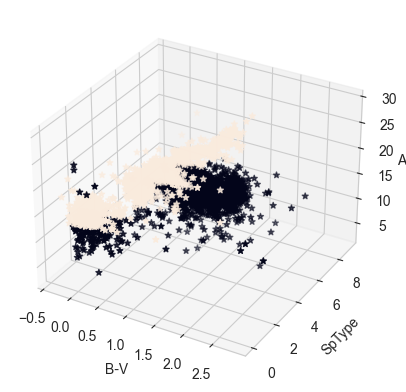

STAR99999


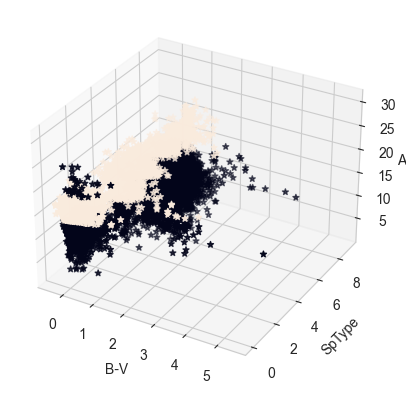

In [9]:
print("STAR9999")

xx = star9999[['B-V', 'SpType', 'Amag']]
yy = model.predict(xx)

sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = xx['B-V']
y = xx['SpType']
z = xx['Amag']
t = yy

ax.set_xlabel("B-V")
ax.set_ylabel("SpType")
ax.set_zlabel("Amag")

ax.scatter(x, y, z, c=t, marker='*')
plt.show()

print("STAR99999")

xx = star99999[['B-V', 'SpType', 'Amag']]
yy = model.predict(xx)

sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = xx['B-V']
y = xx['SpType']
z = xx['Amag']
t = yy

ax.set_xlabel("B-V")
ax.set_ylabel("SpType")
ax.set_zlabel("Amag")

ax.scatter(x, y, z, c=t, marker='*')
plt.show()